<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_2/2_3_3_Exploracion_visual_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración de datos

La visualización de datos es una parte esencial del análisis de datos, ya que nos permite comunicar y comprender la información de manera efectiva a través de representaciones gráficas.

Este proceso puede involucrar los siguiente aspectos:

* **Elección de la visualización**: Antes de comenzar a crear gráficos, es importante comprender los datos que se van a visualizar y determinar qué tipo de gráfico es el más adecuado para representarlos. Algunas preguntas clave a considerar son: ¿qué tipo de datos tengo (numéricos, categóricos, temporales)? ¿Qué relaciones quiero mostrar (correlaciones, distribuciones, comparaciones)? ¿Cuál es el propósito de la visualización (informar, explorar, persuadir)?

* **Selección de la librería**: Hay varias librerías de visualización en Python, nuestra elección dependerá del tipo de gráfico que deseemos crear y del nivel de interactividad requerido.

* **Preparación de los datos**: Antes de crear la visualización, podría ser necesario realizar algunas operaciones de preparación de los datos. Esto podría implicar filtrar, agrupar o transformar los datos para que sean aptos para el tipo de gráfico que deseas crear.

* **Creación de la visualización**: Cada librería tiene su propia sintaxis y enfoque para crear gráficos, pero en general, será necesario especificar las variables de los ejes, colores, títulos, leyendas, etc.

* **Análisis e interpretación**: Una vez creada la visualización, es el momento de analizarla e interpretarla. Observaremos los patrones, tendencias y relaciones que surgen de la representación gráfica para extraer conclusiones relevantes de los datos.

### Librerías Python
* **Matplotlib**: Es una de las librerías de visualización más utilizadas en Python. Ofrece una gran flexibilidad para crear una amplia variedad de gráficos, desde simples hasta complejos. Es una excelente opción para empezar y aprender visualización de datos.

* **Seaborn**: Seaborn se basa en Matplotlib y proporciona una interfaz más sencilla para crear gráficos estadísticos atractivos. Es especialmente útil para visualizar relaciones estadísticas y distribuciones de datos.

* **Plotly**: Esta librería es muy versátil y ofrece una gran cantidad de gráficos interactivos y elegantes. Podremos crear gráficos 2D y 3D, así como visualizaciones interactivas y animadas.

* **Bokeh**: Bokeh es ideal para crear visualizaciones interactivas para aplicaciones web.

* **Ggplot**: Ggplot es una versión de Python basada en el popular paquete R ggplot2. Permite crear gráficos elegantes y versátiles utilizando una sintaxis similar a la de ggplot2.

In [5]:
from rich.console import Console
console = Console()

## Conjunto de datos de Diabetes

In [26]:
"""
En este cuaderno trabajaremos con el Diabetes Dataset de Sci-Kit Learn
https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
Y utilizaremos la librería Seaborn para la visualización de datos
https://seaborn.pydata.org/
"""
console.rule("[bold]Datos de trabajo[/bold]")


from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid") # muestra la cuadrícula de posición en los gráficos
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) # Esta opción permite que se muestren
# todas las columnas en el dataset
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = load_diabetes()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
print(df.describe())

console.rule("[green]Descripción del dataset[/green]")
print(f"\n {data.DESCR}")

──────────────────────────────────────────────── Datos de trabajo ─────────────────────────────────────────────────

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

───────────────────────────────────────────── Descripción del dataset ─────────────────────────────────────────────


 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these

In [27]:
# Vamos a renombrar las columnas siguiendo la nomenclatura de las variables clínicas
df = df.rename(columns={'s1': 'tc', 's2': 'ldl', 's3': 'hdl', 's4': 'tch', 's5': 'ltg', 's6': 'glu'})
print(df)

# Nota, como habrás observado, este dataset ha sido previamente normalizado
# para facilitar la aplicación de ciertos modelos de aprendizaje automático

          age       sex       bmi        bp        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

          tch       ltg       glu  
0   -0.002592  0.019907 -0.017646  
1  

## Gráfico de dispersión

### Seaborn

<ipython-input-29-71d0a72e9558>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='bmi', y='ldl', palette='Pastel1', legend='full', ax=axes[0])


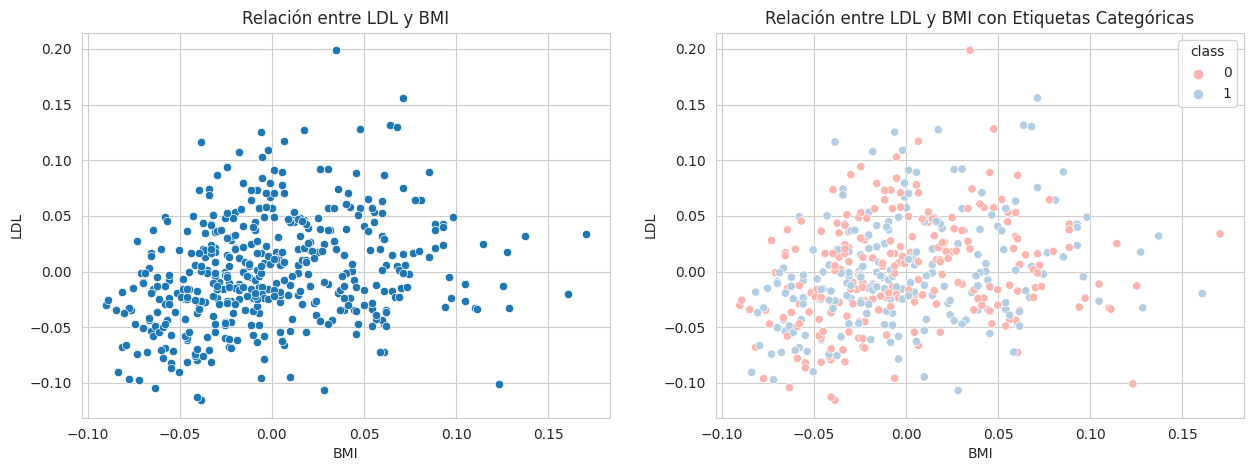

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veamos cómo se relacionan los niveles de LDL y el Índice de Masa Corporal (BMI)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
data = df # Nuestro datos

# Gráfico 1: Scatterplot sin etiquetas categóricas
sns.scatterplot(data=data, x='bmi', y='ldl', palette='Pastel1', legend='full', ax=axes[0])
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('LDL')
axes[0].set_title('Relación entre LDL y BMI')

# Gráfico 2: Scatterplot con etiquetas categóricas (dummy)
class_l = np.random.randint(2, size=len(data))
data_with_class = data.copy()
data_with_class['class'] = class_l
sns.scatterplot(data=data_with_class, x='bmi', y='ldl', palette='Pastel1', legend='full', hue='class', ax=axes[1])
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('LDL')
axes[1].set_title('Relación entre LDL y BMI con Etiquetas Categóricas')

plt.show()


### Plotly

In [30]:
import numpy as np
import plotly.express as px

# Generar datos de ejemplo
np.random.seed(42)
num_samples = 100
data = {
    'bmi': np.random.normal(25, 5, num_samples),
    'ldl': np.random.normal(120, 30, num_samples),
    'class': np.random.randint(2, size=num_samples)
}

# Crear el scatter plot sin etiquetas categóricas
fig1 = px.scatter(data_frame=data, x='bmi', y='ldl', color_discrete_sequence=px.colors.qualitative.Pastel1,
                  labels={'bmi': 'BMI', 'ldl': 'LDL'}, title='Relación entre LDL y BMI')

# Crear el scatter plot con etiquetas categóricas (dummy)
fig2 = px.scatter(data_frame=data, x='bmi', y='ldl', color='class', color_discrete_sequence=px.colors.qualitative.Pastel1,
                  labels={'bmi': 'BMI', 'ldl': 'LDL', 'class': 'Etiquetas Categóricas'},
                  title='Relación entre LDL y BMI con Etiquetas Categóricas')

# Mostrar los gráficos
fig1.show()
fig2.show()


## Gráficos de cajas

### Seaborn

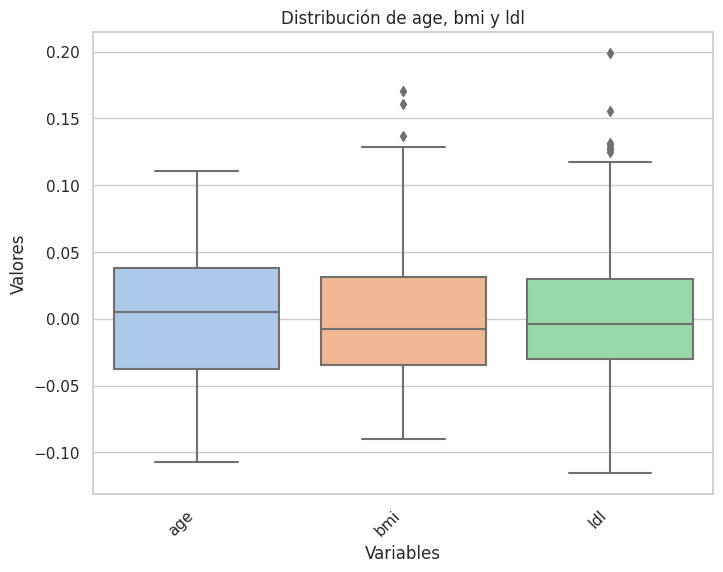

In [32]:
# Por legibilidad y para reducir el tiempo de ejecución
# reducimos el dataset a las siguientes tres variables
df_s = df[['age', 'bmi', 'ldl']]

plt.figure(figsize=(8, 6))

# Personalización del estilo
sns.set(style='whitegrid')  # Fondo con rejilla blanca
colors = sns.color_palette('pastel')  # Paleta de colores 'pastel'

# Boxplot con etiquetas de los ejes y título
ax = sns.boxplot(data=df_s, palette=colors)
ax.set(xlabel='Variables', ylabel='Valores', title='Distribución de age, bmi y ldl')

# Etiquetas de los ticks del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

### Plotly

In [38]:
import plotly.express as px

import pandas as pd
import plotly.express as px

# Convertir DataFrame a formato apilado
df_stacked = pd.melt(df_s, value_vars=['age', 'bmi', 'ldl'], var_name='Variable', value_name='Valor')

# Crear el boxplot con colores personalizados para cada variable
fig = px.box(df_stacked, x='Variable', y='Valor', color='Variable', color_discrete_map={'age': 'red', 'bmi': 'blue', 'ldl': 'green'},
             title='Distribución de age, bmi y ldl')

# Personalización de estilo
fig.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.7)
fig.update_layout(xaxis_title='Variables', yaxis_title='Valores', xaxis_tickangle=-45)

# Mostrar el gráfico
fig.show()



## Gráficos de distribución

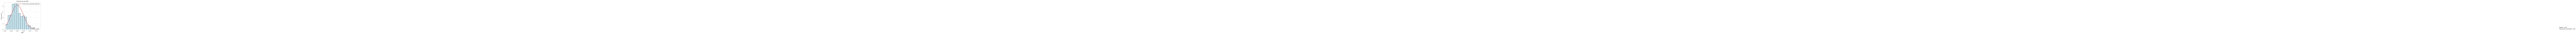

In [43]:
from scipy.stats import norm

# Ajustar el histograma de la distribución de BMI con una distribución normal
parameters = norm.fit(df['bmi'].values)

# Crear el histograma y ajustar la distribución normal
sns.histplot(data=df, x='bmi', kde=False, stat='density', color='lightblue', edgecolor='black', linewidth=1, alpha=0.7)
sns.lineplot(x=df['bmi'], y=norm.pdf(df['bmi'], *parameters), color='r', linewidth=2.5)

# Etiquetas y personalización del gráfico
plt.title("Distribución de BMI")
plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.legend(["Distribución ajustada (Normal)"])
plt.text(20, 0.04, "Media: {:.2f}\nDesviación estándar: {:.2f}".format(parameters[0], parameters[1]),
         bbox=dict(facecolor='white', alpha=0.5))
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()



## Gráficos de pares
Un gráfico de pares muestra todas las combinaciones posibles de diagramas de dispersión (scatter plots) para todas las variables numéricas en un DataFrame. En el caso de tener n variables numéricas, el gráfico de pares mostrará n x n diagramas de dispersión. Los diagramas de dispersión muestran la relación entre dos variables mediante la representación de puntos en un plano cartesiano, donde cada punto representa una observación en el conjunto de datos.

Además, en la diagonal del gráfico de pares, se muestran histogramas o gráficos de densidad para cada variable numérica individualmente. Estos histogramas o gráficos de densidad permiten visualizar la distribución de cada variable por separado.

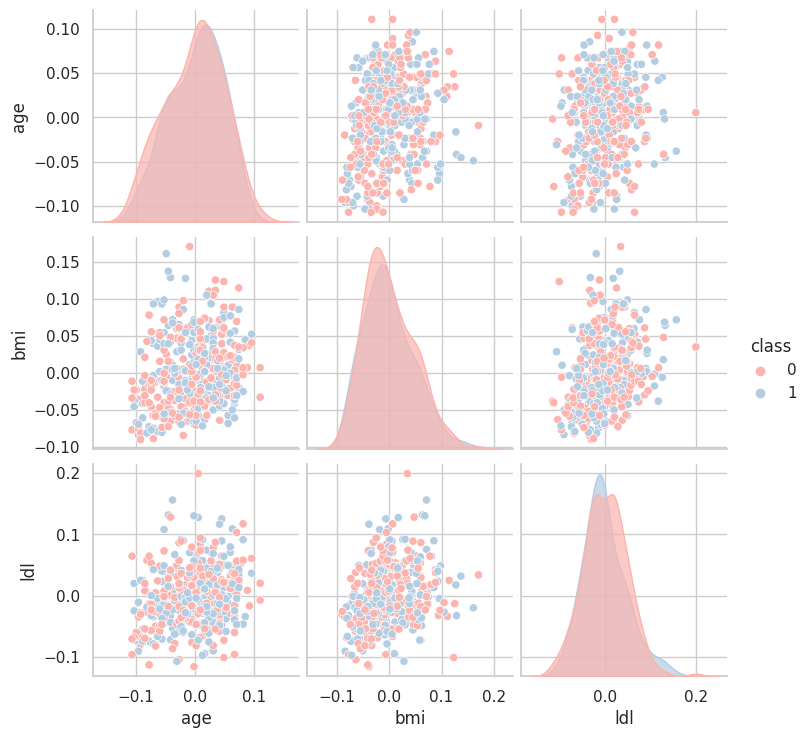

In [45]:
# Seleccionar las columnas relevantes del DataFrame
df_l = data_with_class[['age', 'bmi', 'ldl', 'class']]

# Crear el gráfico de pares (pair plot)
sns.pairplot(df_l, palette='Pastel1', hue='class', diag_kws={'alpha': 0.7})

# Mostrar el gráfico
plt.show()


## Plotly

In [48]:
import plotly.express as px

# Crear el gráfico de pares (pair plot)
fig = px.scatter_matrix(
    df_l,
    dimensions=['age', 'bmi', 'ldl'], color='class',
    color_discrete_map={'0': 'red', '1': 'blue'}
  )

# Personalización del estilo
fig.update_traces(marker=dict(size=5, opacity=0.7), selector=dict(mode='markers'))
fig.update_layout(title='Gráfico de Pares (Pair Plot) con Plotly')

# Mostrar el gráfico
fig.show()
